# Saving and Loading a Trained Naive Bayes classifier

In [2]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
# Make sure module is reloaded, I do NOT understand why I need this module, but it would not work without it for some reason :C
import Ontology_Interpreter as oi

Using the Ontology_Interpreter file to parse the xml file to csv by querying the data with the appropiate format
The ontology interpreter needs to be ran first since the news models depend on the parsed CSV file result.

In [3]:
df = oi.load_news_data_from_rdf_xml('../News_Categorizer_RDF.xml')
oi.parse_to_csv(df)

import importlib
import News_Models as nm
importlib.reload(nm)

Successfully loaded 9999 news articles!

Dataset shape: (9999, 5)

First 5 articles:
  article_id  category                                           headline  \
0   Article1  WELLNESS              143 Miles in 35 Days: Lessons Learned   
1   Article2  WELLNESS       Talking to Yourself: Crazy or Crazy Helpful?   
2   Article3  WELLNESS  Crenezumab: Trial Will Gauge Whether Alzheimer...   
3   Article4  WELLNESS                     Oh, What a Difference She Made   
4   Article5  WELLNESS                                   Green Superfoods   

                                   short_description     place  
0  Resting is part of training. I've confirmed wh...  Torrance  
1  Think of talking to yourself as a tool to coac...   Norwalk  
2  The clock is ticking for the United States to ...   Norwalk  
3  If you want to be busy, keep trying to be perf...   Norwalk  
4  First, the bad news: Soda bread, corned beef a...   Norwalk  

Categories found:
category
SPORTS            1002
TRAVEL     

<module 'News_Models' from 'c:\\Users\\andre\\Downloads\\Intelligent-News-Categorization-and-City-Navigation-Agent\\Bayes_News_Categorizers\\News_Models.py'>

## Model testing

In this area, we call the news model to simplify running each model separately.
The return values of each model function is an **accuracy score**, the **model used to run the test** and
**the vectorizer**


Short Descriptions Model Results:
Accuracy: 0.6003 (60.03%)

Classification Report:
                precision    recall  f1-score   support

      BUSINESS       0.63      0.65      0.64       300
 ENTERTAINMENT       0.55      0.44      0.49       300
  FOOD & DRINK       0.62      0.61      0.62       300
     PARENTING       0.49      0.63      0.55       300
      POLITICS       0.62      0.51      0.56       300
        SPORTS       0.72      0.69      0.71       300
STYLE & BEAUTY       0.67      0.57      0.62       300
        TRAVEL       0.61      0.61      0.61       300
      WELLNESS       0.49      0.61      0.54       300
    WORLD NEWS       0.66      0.67      0.66       300

      accuracy                           0.60      3000
     macro avg       0.61      0.60      0.60      3000
  weighted avg       0.61      0.60      0.60      3000



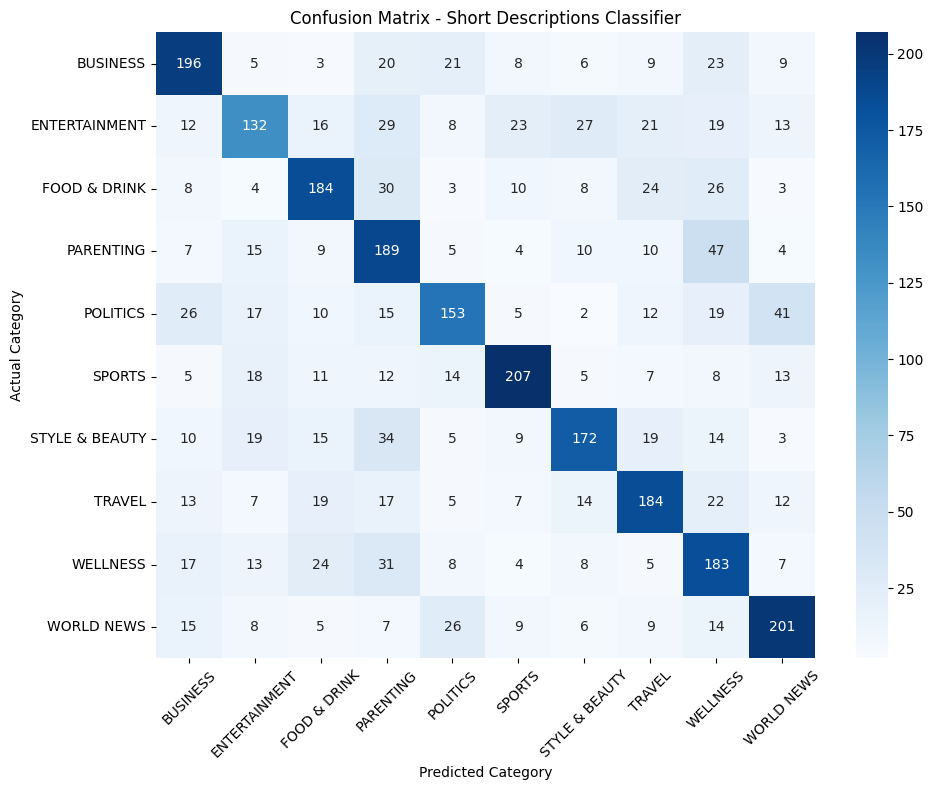

\Headlines Model Results:
Accuracy: 0.6830 (68.30%)

Classification Report:
                precision    recall  f1-score   support

      BUSINESS       0.72      0.66      0.69       300
 ENTERTAINMENT       0.67      0.61      0.64       300
  FOOD & DRINK       0.72      0.76      0.74       300
     PARENTING       0.62      0.66      0.64       300
      POLITICS       0.65      0.62      0.63       300
        SPORTS       0.73      0.86      0.79       300
STYLE & BEAUTY       0.75      0.78      0.76       300
        TRAVEL       0.68      0.65      0.67       300
      WELLNESS       0.60      0.54      0.57       300
    WORLD NEWS       0.67      0.69      0.68       300

      accuracy                           0.68      3000
     macro avg       0.68      0.68      0.68      3000
  weighted avg       0.68      0.68      0.68      3000



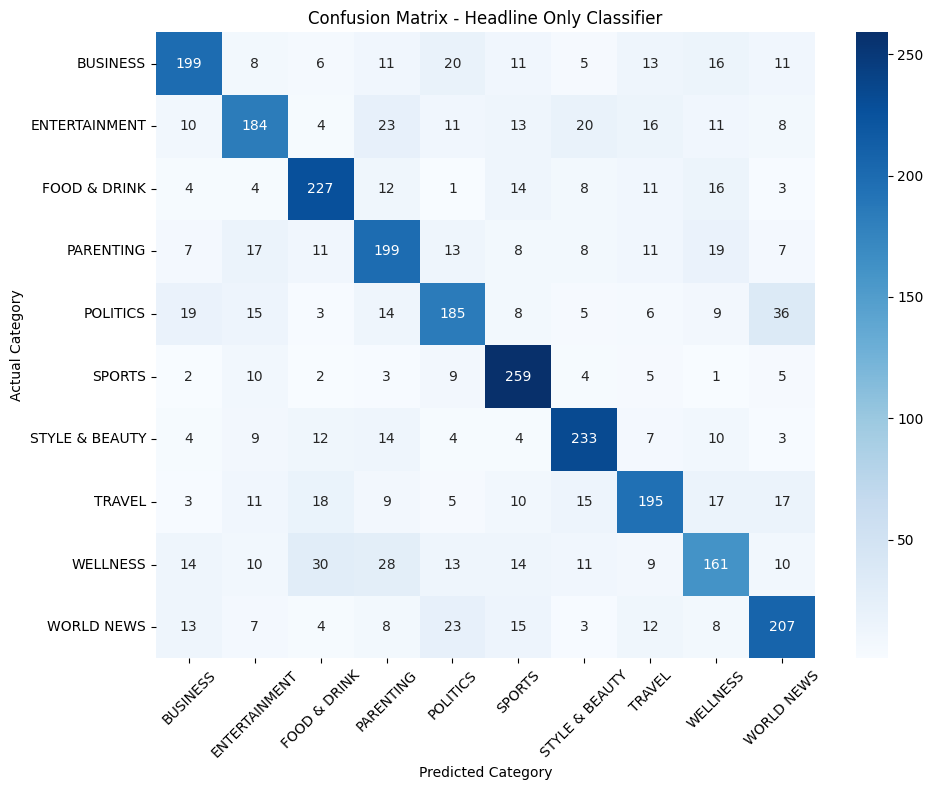


Combined (Headlines + Descriptions) Model Results:
Accuracy: 0.7583 (75.83%)

Classification Report:
                precision    recall  f1-score   support

      BUSINESS       0.73      0.75      0.74       300
 ENTERTAINMENT       0.76      0.69      0.73       300
  FOOD & DRINK       0.81      0.82      0.82       300
     PARENTING       0.66      0.72      0.69       300
      POLITICS       0.74      0.68      0.71       300
        SPORTS       0.88      0.92      0.90       300
STYLE & BEAUTY       0.83      0.79      0.81       300
        TRAVEL       0.75      0.75      0.75       300
      WELLNESS       0.65      0.68      0.66       300
    WORLD NEWS       0.78      0.77      0.78       300

      accuracy                           0.76      3000
     macro avg       0.76      0.76      0.76      3000
  weighted avg       0.76      0.76      0.76      3000



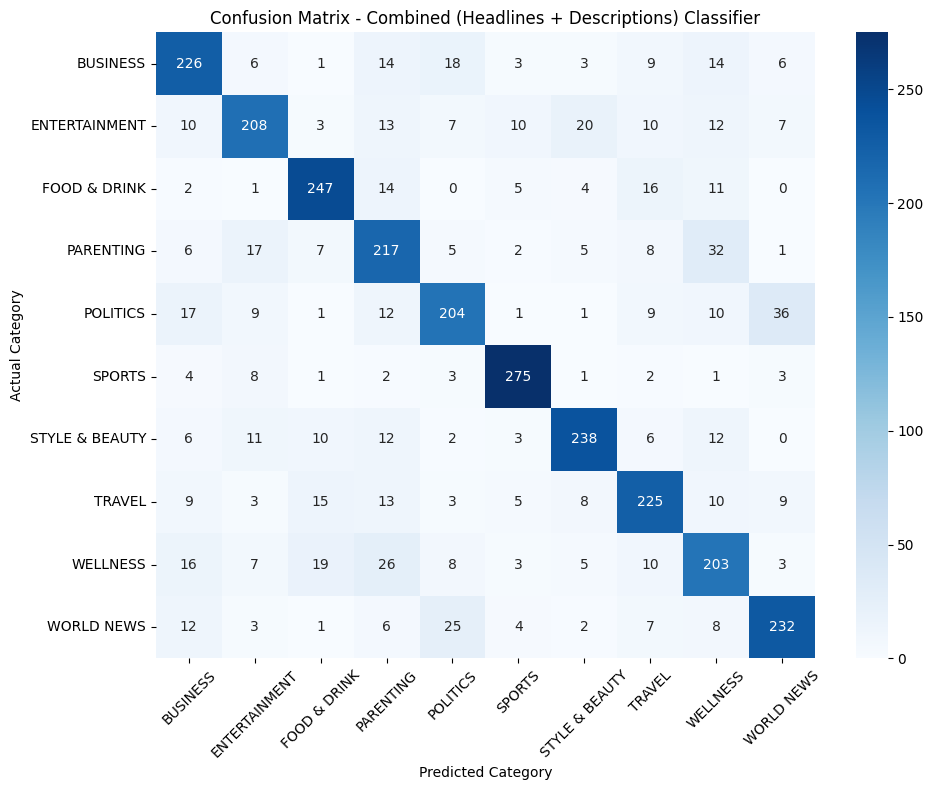


MODEL COMPARISON:
Headlines Only: 0.6830
Short Descriptions Only: 0.6003
Combined: 0.7583

 Best Model: Combined with 0.7583 accuracy

Model objects captured:
short_desc_model: <class 'sklearn.naive_bayes.MultinomialNB'>
headline_model: <class 'sklearn.naive_bayes.MultinomialNB'>
combined_model: <class 'sklearn.naive_bayes.MultinomialNB'>


In [4]:
#Test short description
short_desc_accuracy, short_desc_model, short_desc_vectorizer = nm.short_description_classifier()

#Test Headlines
headline_accuracy, headline_model, headline_vectorizer = nm.headline_classifier()

#Test combined approach
combined_accuracy, combined_model, combined_vectorizer = nm.combined_classifier()

print(f"\n{'='*50}")
print("MODEL COMPARISON:")
print(f"Headlines Only: {headline_accuracy:.4f}")
print(f"Short Descriptions Only: {short_desc_accuracy:.4f}")
print(f"Combined: {combined_accuracy:.4f}")

# Find best model
best_model = max([
    ("Headlines Only", headline_accuracy),
    ("Short Descriptions Only", short_desc_accuracy), 
    ("Combined", combined_accuracy)
], key=lambda x: x[1])

print(f"\n Best Model: {best_model[0]} with {best_model[1]:.4f} accuracy")

# Confirm we have the model objects
print(f"\nModel objects captured:")
print(f"short_desc_model: {type(short_desc_model)}")
print(f"headline_model: {type(headline_model)}")
print(f"combined_model: {type(combined_model)}")

## Results

**Headlines only**: 68.30% Accuracy
**Short description only**: 60.03% Accuracy
**Combined**: 75.83% Accuracy

The combined approach was the clear winner, thus the saved file for the bot to use in the cityPulse AI agent will be this one

## Saving the model

Pickle is used on the save_model function on the news model file to be able to save the vectorizer and the model returned

In [14]:
#Save the model and vectorizer
nm.save_model(combined_model, combined_vectorizer, 'nb_combined_model.pkl', 'combined_vectorizer.pkl')


In [15]:
# Load the pre-trained model and vectorizer and make a prediction
loaded_model, loaded_vectorizer = nm.load_model('nb_combined_model.pkl', 'combined_vectorizer.pkl')


After saving, we load the model an test it with a custom headline and short description convo, the result is successfull

In [18]:
# Test the loaded classifier with a sample string
sample_string = "The right mindset: a guide to a stoic thought  The article describes a philosophy based on Marcus Aurelius book called meditations where it talks about stoicism, which is based on the control of emotions."
sample_transformed = loaded_vectorizer.transform([sample_string])
prediction = loaded_model.predict(sample_transformed)

In [19]:
print(f"Prediction for sample '{sample_string}': \n{prediction}")

Prediction for sample 'The right mindset: a guide to a stoic thought  The article describes a philosophy based on Marcus Aurelius book called meditations where it talks about stoicism, which is based on the control of emotions.': 
['WELLNESS']
